In [1]:
# !/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on 20190115

@author: zhangji

"""

%pylab inline
pylab.rcParams['figure.figsize'] = (25, 11)
fontsize = 40

import numpy as np
import scipy as sp
from scipy.optimize import leastsq, curve_fit
from scipy import interpolate
from scipy.interpolate import interp1d
from scipy.io import loadmat, savemat
# import scipy.misc

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import animation, rc
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from mpl_toolkits.mplot3d import Axes3D, axes3d

from sympy import symbols, simplify, series, exp
from sympy.matrices import Matrix
from sympy.solvers import solve

from IPython.display import display, HTML
from tqdm import tqdm_notebook as tqdm
import pandas as pd
import re
from scanf import scanf
import os
import glob
import importlib
from time import time

from codeStore import support_fun as spf
from src.support_class import *

rc('animation', html='html5')
PWD = os.getcwd()
font = {'size': 20}
matplotlib.rc('font', **font)
np.set_printoptions(linewidth=90, precision=5)


Populating the interactive namespace from numpy and matplotlib


In [131]:
# check convergence1, infspace

dir_name = 'compare_Liu/gFig_2_a/theta_0.13'
t_dir = os.path.join(PWD, dir_name)
txt_names = glob.glob('./%s/*.txt' % dir_name)

psi2 = []
psi3 = []
psi61 = []
psi62 = []
ph = []
zf = []
for txt_name in txt_names:
    with open(txt_name, 'r') as ftxt:
        FILE_DATA = ftxt.read()
    
    text_headle = 'Translation, helix forces and torques \['
    temp1 = spf.read_array(text_headle, FILE_DATA, array_length=6)
    psi2.append(temp1[2])
    psi61.append(temp1[5])
        
    text_headle = 'Rotation, helix forces and torques \['
    temp1 = spf.read_array(text_headle, FILE_DATA, array_length=6)
    psi62.append(temp1[2])
    psi3.append(temp1[5])
    
    text_headle = 'helix pitch: '
    temp1 = spf.read_array(text_headle, FILE_DATA, array_length=1)
    ph.append(temp1)
    
    text_headle = 'geometry zoom factor is '
    temp1 = spf.read_array(text_headle, FILE_DATA, array_length=1)
    if np.isclose(temp1, 1):
        temp1 = 0
    zf.append(temp1)

data1 = pd.DataFrame({'ph': np.hstack(ph), 
                      'zf': np.hstack(zf), 
                      'psi2': np.hstack(psi2), 
                      'psi3': np.hstack(psi3), 
                      'psi61': np.hstack(psi61), 
                      'psi62': np.hstack(psi62), })\
        .pivot_table(columns=['zf'])

psi2 = data1.loc['psi2']
psi3 = data1.loc['psi3']
psi61 = data1.loc['psi61']
psi62 = data1.loc['psi62']


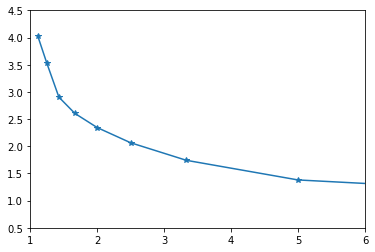

In [132]:
t1 = -psi61 / psi2
t1 = t1 / t1[0]
fig, ax1 = plt.subplots(nrows=1, ncols=1)
fig.patch.set_facecolor('white')
ax1.plot(1 / t1.index, t1.values, '-*')
ax1.set_xlim(1, 6)
ax1.set_ylim(0.5, 4.5)
pass

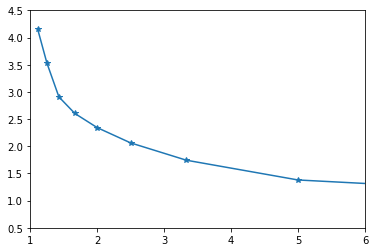

In [130]:
t1 = -psi61 / psi2
t1 = t1 / t1[0]
fig, ax1 = plt.subplots(nrows=1, ncols=1)
fig.patch.set_facecolor('white')
ax1.plot(1 / t1.index, t1.values, '-*')
ax1.set_xlim(1, 6)
ax1.set_ylim(0.5, 4.5)
pass

In [122]:
psi3

zf
0.0     64.066096
0.1      4.483837
0.2      5.345983
0.3      6.415537
0.4      7.632954
0.5      9.056660
0.6     10.944546
0.7     14.179724
0.8     26.264814
0.9    106.215720
Name: psi3, dtype: float64

In [121]:
psi3

zf
0.0     64.066096
0.1      4.483837
0.2      5.345983
0.3      6.415537
0.4      7.632954
0.5      9.056660
0.6     10.944546
0.7     14.179724
0.8     26.264814
0.9    106.215720
Name: psi3, dtype: float64